In [38]:
# load the cleaned game data
import pandas as pd 

game_df = pd.read_csv('cleaned_game_data.csv', index_col = [0])
game_df.head(1)

,Game,Price,Genres,IGN_score,Release Date,Player Sentiment,Positive Reviews [%],No. of Reviews
0,Matchpoint - Tennis Championships,31.49,"Simulation, Sports",5.0,2022-07-07,Mostly Positive,0.78,19


In [39]:
# What are the descriptive statistics?
game_df.describe()

,Price,IGN_score,Positive Reviews [%],No. of Reviews
count,384.000000,384.000000,384.000000,3.840000e+02
mean,25.848776,7.420833,0.795573,2.823946e+04
std,13.174299,1.435664,0.140492,1.199789e+05
min,0.000000,2.000000,0.250000,1.600000e+01
25%,15.490000,7.000000,0.720000,8.272500e+02
50%,24.990000,8.000000,0.830000,3.948500e+03
75%,34.990000,8.500000,0.900000,1.561975e+04
max,59.990000,10.000000,0.980000,2.043532e+06


In [11]:
# get the median and the range for No. of Reviews
NOR_med = game_df['No. of Reviews'].median()
NOR_med

3948.5

Observations:

1. IGN reviews score games on a scale from 1 to 10. The mean score is 7.4. According to the IGN website 7 corresponds to a rating of 'good'. Intuitively you might guess the mean should be 5.5. Likely IGN intentionally review games they think will be popular/good.

2. Similarly the mean player positive review % is above 0.5% at 0.8%. Likely because IGN reviews the types of games that are anticipated/enjoyed by players.

3. For no. of reviews left by players the std is greater than the mean. The median of the no. of reviews is an order less than the mean so the data is positively skewed. Maybe some really popular games get an unusually high no. of reviews.

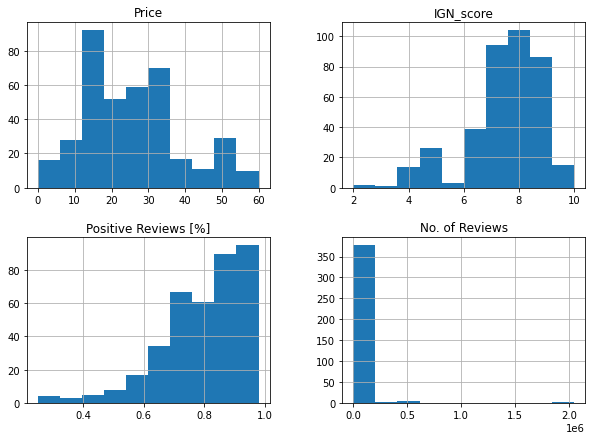

In [40]:
# Plot histograms to visualise the distrabution of data for each numerical column.
game_df.hist(figsize = (10,7));

In [41]:
# What is the game of the game at the right of the histogram?

game_df[game_df['No. of Reviews'] > 1*10**6]

# PUBG is a massively mutiplayer game and free to play. 
# It is one of the most popular games on Steam with 527K peak concurrent players as of April 2022.

,Game,Price,Genres,IGN_score,Release Date,Player Sentiment,Positive Reviews [%],No. of Reviews
49,PUBG: Battlegrounds,0.0,"Action, Adventure, Free to Play, Massively Mu...",8.0,2017-12-21,Mixed,0.56,2043532


Now I have general overview of the distribution of data in numerical columns. Next I can explore what impact game genre has on price, IGN review score, and positive player review %:

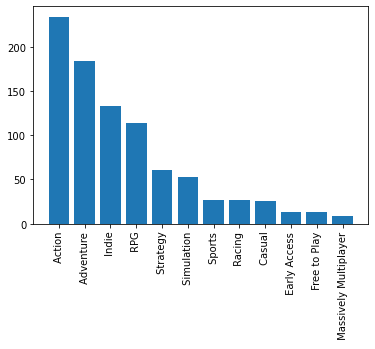

In [51]:
# What is the distribution of genres in the data?

genres = game_df['Genres'].str.split(',', expand=True).stack().value_counts()
genres_df = pd.DataFrame(genres).reset_index()
genres_df.rename(columns = {'index':'Genre',0:'Count'}, inplace = True)
plt.bar(genres_df['Genre'],genres_df['Count'])
plt.xticks(rotation=90);

<Figure size 432x288 with 0 Axes>

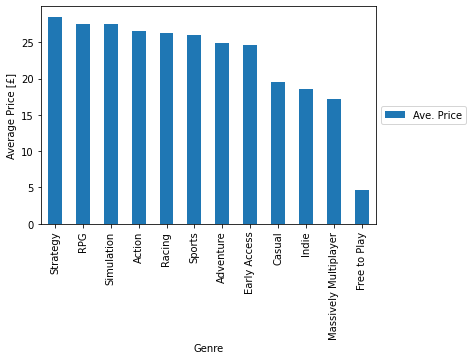

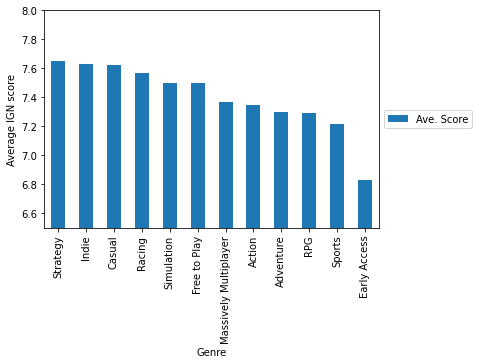

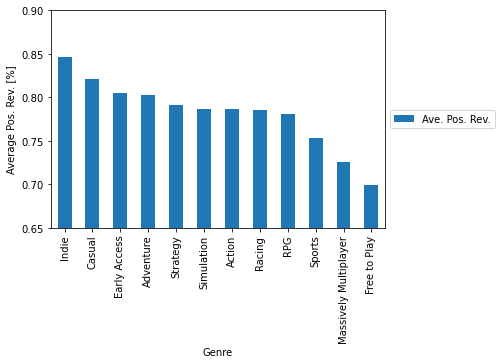

In [53]:
#What are the average game price, IGN review score, and positve review % for each genre?

genres = ['Simulation', 'Sports', 'Action', 'Adventure', 'Indie', 'Racing',
   'RPG', 'Strategy', 'Casual', 'Early Access', 'Massively Multiplayer',
   'Free to Play']

ave_price = []
ave_score = []
ave_pos = []
for genre in genres:
    
    bool_series = game_df['Genres'].str.contains(genre) #get genre bool
    value1 = (game_df['Price']).loc[bool_series].mean()
    ave_price.append(value1)
    value2 = (game_df['IGN_score']).loc[bool_series].mean()
    ave_score.append(value2)
    value3 = (game_df['Positive Reviews [%]']).loc[bool_series].mean()
    ave_pos.append(value3)
    
all_data = {'Genre':genres}
all_data['Ave. Price'] = ave_price
all_data['Ave. Score'] = ave_score
all_data['Ave. Pos. Rev.'] = ave_pos

ave_df = pd.DataFrame(all_data)
ave_df.sort_values(by = ['Ave. Price'], ascending = False, inplace = True)

plt.figure(1)
ave_df.plot(x = 'Genre', y = ['Ave. Price'], kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Average Price [£]');

ave_df.sort_values(by = ['Ave. Score'], ascending = False, inplace = True)

plt.figure(2)
ave_df.plot(x = 'Genre', y = ['Ave. Score'], kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Average IGN score');
plt.ylim(6.5,8)

ave_df.sort_values(by = ['Ave. Pos. Rev.'], ascending = False, inplace = True)

plt.figure(3)
ave_df.plot(x = 'Genre', y = ['Ave. Pos. Rev.'], kind = 'bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Average Pos. Rev. [%]');
plt.ylim(0.65,0.9);

In [30]:
# game_df.loc[game_df['Genres'].str.contains('Free to Play')]
# The non zero average price of the free to play genre is due to two Destiny games...

Price:

There are three rough groups that different genres are priced at. Around £25, around £20 and free to play. Interestingly the free to play group does not cost £0 on average but approx. £5. This is due to two full price games labelled as free to play?

IGN score:

Again we see that the distribution of IGN scores is quite narrow. Notably they score early access games noticeably less than other genres on average.

Positive review %:

It is more clear for players what they like/dislike or review favourable/poorly. Players least like genre on average is free to play unlike the IGN reviewers. 

***
Next how do the opinions of the IGN reviews compare to the player reviewers?:


,IGN_score round,Positive Reviews [%]
IGN_score round,1.000000,0.944821
Positive Reviews [%],0.944821,1.000000


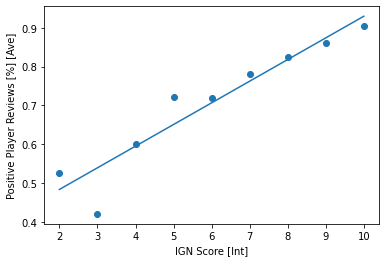

In [54]:
# Need to directly compare IGN score and positive review percentage.
# Get the relationship between them.

import numpy as np
game_df['IGN_score round'] = game_df['IGN_score'].round()
# Get int ign scores to make larger groupings
ave_score = game_df.groupby(['IGN_score round'])['Positive Reviews [%]'].mean().reset_index()
# somehow reset index makes it a dataframe

plt.scatter(x = ave_score['IGN_score round'], y = ave_score['Positive Reviews [%]'])
z = np.polyfit(ave_score['IGN_score round'],ave_score['Positive Reviews [%]'],1)
p = np.poly1d(z)
plt.plot(ave_score['IGN_score round'], p(ave_score['IGN_score round']))
plt.xlabel('IGN Score [Int]')
plt.ylabel('Positive Player Reviews [%] [Ave]')

ave_score.corr()

In [55]:
# Convert IGN score to same measure as positive player review.
# Coefficients taken from fit p
ave_df['Converted Score'] = (0.056*ave_df['Ave. Score']) + 0.371
ave_df

,Genre,Ave. Price,Ave. Score,Ave. Pos. Rev.,Converted Score
4,Indie,18.569774,7.628571,0.846692,0.798200
8,Casual,19.548462,7.623077,0.821154,0.797892
9,Early Access,24.674615,6.830769,0.804615,0.753523
3,Adventure,24.967065,7.298370,0.802120,0.779709
7,Strategy,28.523443,7.649180,0.790984,0.799354
0,Simulation,27.492264,7.501887,0.786226,0.791106
2,Action,26.497991,7.350000,0.786154,0.782600
5,Racing,26.323333,7.566667,0.785185,0.794733
6,RPG,27.498947,7.291228,0.781053,0.779309
1,Sports,26.046296,7.218519,0.753333,0.775237


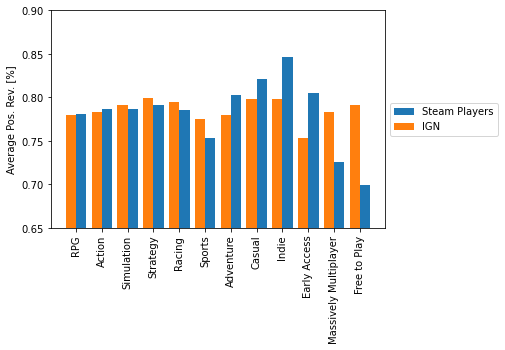

In [57]:
# Comparison between players and reviewers 

ave_df['diff'] = abs(ave_df['Ave. Pos. Rev.']-ave_df['Converted Score'])

ave_df.sort_values(by = ['diff'], ascending = True, inplace = True) 

# sorted by magnitude of difference of player positive % and IGN positive %

x_axis = np.arange(len(ave_df['Genre']))

plt.figure(3)
plt.bar(x = x_axis + 0.2, height = ave_df['Ave. Pos. Rev.'], width = 0.4, label = 'Steam Players')
plt.bar(x = x_axis - 0.2, height = ave_df['Converted Score'], width = 0.4, label = 'IGN')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Average Pos. Rev. [%]');
plt.ylim(0.65,0.9);

plt.xticks(x_axis, ave_df['Genre'])
plt.xticks(rotation=90);

~ 0.05% is equivalent to 1 level in the IGN rating system

For the same games:

1. Players rate indie and early access games 1 score level higher than IGN. 

2. Players rate free to play games 2 score levels lower than IGN. Massively multiplayer 1 score level lower.

3. Other than Indie, Early access, Free to play, & massively multiplayer games IGN reviews agree well with player sentiment.